# Module 1 - Lab 1: Rstats refresher

## Overview
- R basics (classes, objects, functions, etc.)
- Introduction to the "tidyverse"
- Loops and lapply functions

## R basics

### Objects

In an R session, data items are referred to as *objects*. Objects represent a value and typically contain a class and/or attributes. Obejcts include numbers, character strings, and pre-loaded data (for example, the object `letters`, which is a vector of letters in the alphabet, comes loaded in interactive R sessions).

In [16]:
## first 3 values of letters object
letters[1:3]

[1] "a" "b" "c"

Users can create new R obejcts by assigning names to values, using the assignment `<-` operator. For example, in the code below, the first three values in `letters` is stored in a new object `x`.

In [17]:
## assign first 3 letters values to x
x <- letters[1:3]

## print x
x

[1] "a" "b" "c"

The assignment `<-` operator will override previous values if the named object already exists. For example, we can override letters by storing a vector of numbers in it.

In [18]:
(letters <- c(1, 2, 3))

[1] 1 2 3

Writing this kind of code (overriding preloaded objects or functions) can quickly create havok. To remove an object you created, use the `rm()` function.

In [19]:
## remove letters
rm(letters)

## now the preloaded original version should remain
letters[1:3]

[1] "a" "b" "c"

### Classes

A class describes an object's type in R. Common classes are `numeric` (or `double`), `integer`, `logical`, `character`, `factor`, `list`, and `data.frame`. You can figure out an object's class using the `class()` function.

#### Numeric

A `numeric` (or `double`) is a vector (n values) of floating point numbers.

In [20]:
## numeric values
class(0.5)

[1] "numeric"

#### Integer

An `integer` is a vector of integer numbers.

In [21]:
## use a trailing L to denote integer and not numeric
class(1L)

[1] "integer"

#### Logical

A `logical` is a vector of boolean (true/false) values. These are often used to represent dichotomous variables (instead of 0 and 1, for example). Logical values are also used in conditionals, e.g., `if`, `ifelse`, `else`, which although we won't go into right now it's good to know.

In [22]:
## logical values
class(TRUE)

[1] "logical"

#### Character

A `character` is a vector of string (text) values.

In [23]:
## character values
class("This is a character string.")

[1] "character"

#### Factor

A `factor` is a vector of string (text) values with a fixed list of possible values (levels). 

In [24]:
## factor values
(x <- factor("a", levels = letters))

[1] a
Levels: a b c d e f g h i j k l m n o p q r s t u v w x y z

Since factors assume there are a fixed set of levels, they can be annoying...

In [25]:
## factors are picky
x[2] <- "b"
#x[3] <- "A"
#Warning message in `[<-.factor`(`*tmp*`, 3, value = "A"):
#"invalid factor level, NA generated"

#### List

A `list` is a vector without many restrictions (e.g., they can contain a mixture of character, numeric, logic, etc. vectors). This flexibility makes lists very common in R, but often they need to be converted to different forms prior to data analysis.

In [26]:
(x <- list(numbers = 1:9, letters = letters))

$numbers
[1] 1 2 3 4 5 6 7 8 9

$letters
 [1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j" "k" "l" "m" "n" "o" "p" "q" "r" "s"
[20] "t" "u" "v" "w" "x" "y" "z"

In [27]:
class(x)

[1] "list"

In [28]:
class(x$numbers)

[1] "integer"

In [29]:
class(x$letters)

[1] "character"

#### Data.frame

`data.frames` are lists with a row.names attribute and an equal number of observations (rows) per element (columns).

In [30]:
## error due to unequal number of obs
#(x <- data.frame(numbers = 1:9, letters = letters))
#Error in data.frame(numbers = 1:9, letters = letters): arguments imply differing number of rows: 9, 26

In [31]:
## but this works
df <- data.frame(numbers = 1:26, letters = letters)
head(df)

## class of mtcars (a pre-loaded data set)
class(mtcars)

## preview mtcars
head(mtcars)

numbers,letters
1,a
2,b
3,c
4,d
5,e
6,f


[1] "data.frame"

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


Different classes enable and restrict tasks. Some tasks can only be performed on certain classes. Some function inputs require certain classes. Some functions (methods) get deployed differently depending on an object's class.

In the code below, objects of different classes are added together.

In [32]:
## numeric + numeric = numeric
(x <- 0.5 + 1.5)
class(x)

[1] 2

[1] "numeric"

In [33]:
## integer + integer = integer
(x <- 1L - 1L)
class(x)

[1] 0

[1] "integer"

In [34]:
## integer + numeric = numeric
(x <- 1L + .5)
class(x)

[1] 1.5

[1] "numeric"

In [35]:
## add logical values
TRUE + FALSE + TRUE

[1] 2

In [36]:
## integer equivalents
as.numeric(TRUE)
as.numeric(FALSE)

[1] 1

[1] 0

In [ ]:
## can't add characters
#"a" + "b"
#Error in "a" + "b": non-numeric argument to binary operator

### Functions

Functions implement various tasks (consisting of primitives and/or other functions) in R. Objects can be passed along to a function's arguments (inputs) as parameters for any executed call.

In [37]:
## rnorm() function generates data points using a random normal distribution
(x <- rnorm(3))

## mean() describes the mean of numeric data
mean(x)

## increase sample size
x <- rnorm(300)
mean(x)

## round to 2nd decimal
round(mean(x, na.rm = TRUE), 2)

[1]  2.54791677 -0.01606248 -0.21079082

[1] 0.7736878

[1] -0.0006598094

[1] 0

## loops

Loops are sections of code that iterate through specified tasks.

### while

A `while` loop executes a loop of tasks (functions) until a specified condition occurs.

In [38]:
i <- 0
while (i < 5) {
    i <- i + 1
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


### for

While loops are dangerous, because they can go on infinitely if the condition is never achieved. It's usually better to use a `for` loop, which is a loop that iterates up to a specified maximum number of times. Most `for` loops are written to loop through a sequence of numbers rangine from 1 to n.

In [39]:
for (i in 1:10) {
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


It's better to use an object to sequence along (determine the number of loops) than to specify an arbitrary number like the code above. For example, let's say we want to loop through each column of `mtcars` and round any numeric columns to 0 decimal places.

In [40]:
for (i in seq_along(mtcars)) {
    if (is.numeric(mtcars[, i])) {
        mtcars[, i] <- round(mtcars[, i], 0)
    }
}
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,4,3,16,0,1,4,4
Mazda RX4 Wag,21,6,160,110,4,3,17,0,1,4,4
Datsun 710,23,4,108,93,4,2,19,1,1,4,1
Hornet 4 Drive,21,6,258,110,3,3,19,1,0,3,1
Hornet Sportabout,19,8,360,175,3,3,17,0,0,3,2
Valiant,18,6,225,105,3,3,20,1,0,3,1


## lapply functions

### lapply

Another way to loop through a series of tasks, is to apply a function [programatically] to each element of a vector. The `lapply()` function does this, returning a list of lists.

In [41]:
## find class of each column
head(lapply(mtcars, function(x) class(x)))

## class of output (shorthand version of previous)
class(lapply(mtcars, class))

$mpg
[1] "numeric"

$cyl
[1] "numeric"

$disp
[1] "numeric"

$hp
[1] "numeric"

$drat
[1] "numeric"

$wt
[1] "numeric"

[1] "list"

### sapply

The `sapply()` function is similar, only it attempts to simplify the result.

In [42]:
class(sapply(mtcars, class))

[1] "character"

### vapply

Simplifying via `sapply()` can be a bit unpredictable. You might output objects of different classes using the same code with different inputs. To maximize control over the class and dimension of the outputs, use `vapply()` 

In [43]:
class(vapply(mtcars, class, FUN.VALUE = character(1)))

[1] "character"

## Introduction to the "tidyverse"

The tidyverse refers to a practically and philosophically consistent set of packages. They give R very similiar functionality to pandas in python with the added benefit of making it even easier to generate beautiful data visualizations. - Key packages: [ggplot2](http://ggplot2.tidyverse.org/), [dplyr](http://dplyr.tidyverse.org/), [tidyr](http://tidyr.tidyverse.org/), and [purrr](http://purrr.tidyverse.org/). You can load all tidyverse packages using the official tidyverse package.

In [44]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


### ggplot2

The ggplot2 package is used for plotting data. It can take some getting used to, but it quickly becomes powerful and very flexible.

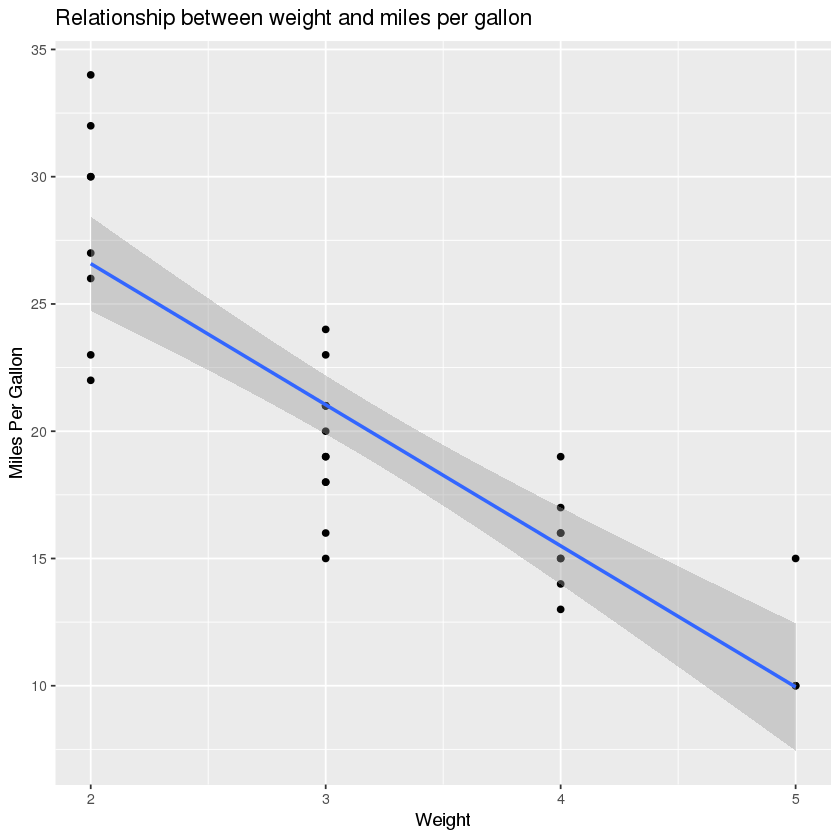

In [45]:
ggplot(mtcars, aes(x = wt, y = mpg)) + 
  geom_point() + 
  geom_smooth(method = "lm") + 
  labs(title = "Relationship between weight and miles per gallon",
       x = "Weight", y = "Miles Per Gallon")

### dplyr

The dplyr package provides key data wrangling functions for slicing, selecting, filtering, arranging, and grouping data.

In [46]:
mtcars %>%
  mutate(car = row.names(mtcars)) %>%
  filter(cyl < 8) %>%
  select(car, cyl, mpg, wt) %>%
  arrange(-mpg)

car,cyl,mpg,wt
Toyota Corolla,4,34,2
Fiat 128,4,32,2
Honda Civic,4,30,2
Lotus Europa,4,30,2
Fiat X1-9,4,27,2
Porsche 914-2,4,26,2
Merc 240D,4,24,3
Datsun 710,4,23,2
Merc 230,4,23,3
Toyota Corona,4,22,2


### tidyr

The tidyr package makes it easy to convert data from wide to long and from long to wide. We'll have many examples of this in the coming weeks!

In [47]:
## convert to wide
mtcars %>%
    group_by(cyl, gear) %>%
    summarise(mpg = mean(mpg)) %>%
    spread(cyl, mpg)

## convert to long
mtcars %>%
    group_by(cyl, gear) %>%
    summarise(mpg = mean(mpg)) %>%
    spread(cyl, mpg) %>%
    gather(cyl, mpg, -gear) %>%
    arrange(mpg)

gear,4,6,8
3,22.00,19.50,14.91667
4,26.75,19.75,NA
5,28.00,20.00,15.50000


gear,cyl,mpg
3,8,14.91667
5,8,15.50000
3,6,19.50000
4,6,19.75000
5,6,20.00000
3,4,22.00000
4,4,26.75000
5,4,28.00000
4,8,NA
